<a href="https://colab.research.google.com/github/GeoAIAfrica/Intro-notebooks/blob/main/Geospatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount your drive
# The below will ask for permission, you should agree:
# Your output should be "Mounted at /content/drive"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%cd "/content/drive/MyDrive/dfki/"
%ls

# Geospatial data

Geospatial data refers to information that is associated with specific geographic locations on the Earth's surface. It has a spatial component, capturing the location, shape, and attributes of geographic entities. Geospatial data can include data on various phenomena, such as land cover, population density, elevation, climate, or transportation networks.

Typically, geospatial data is represented in two ways: vector data and raster data.

1. `Vector Data`: Vector data represents geospatial features using points, lines, and polygons. Each feature has geometric coordinates and associated attributes. Examples of vector file formats include `Shapefile` (.shp), `GeoJSON`, and `Geodatabase`.

  The shapefile is still widely used data format for
storing geospatial vector data. The filename extension for the Shapefile is .shp. Shapefile is not actually only a single file, but it is made of multiple separate files. The three mandatory files that are associated to a valid shapefile dataset are:

  *  .shp containing the feature geometries,
  *  .shx containing a positional index for the feature geometries,
  *  .dbf containing the attribute information.
  *  .prj file which contains information about the coordinate reference system of the dataset.

2. `Raster Data`: Raster data represents geospatial information as a grid of cells or pixels, where each cell holds a value representing an attribute or measurement.

  Raster data is stored in formats such as GeoTIFF, NetCDF, or ASCII Grid.


   
    




# Introduction to spatial data analysis with geopandas

Here we will be using [geopandas](https://geopandas.org/) as our main tool for spatial data analysis. Geopandas extends the capacities of [pandas](https://pythongis.org/part1/chapter-04/index.html) with geospatial operations. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. This means that we can use many familiar methods from pandas also when working with geopandas and spatial features. A `GeoDataFrame` is basically a `pandas.DataFrame` that contains one column for geometries. The geometry column is a `GeoSeries` which contains the geometries  as `shapely` objects (points, lines, polygons, multipolygons etc.).

## Getting started with geopandas

In [ ]:
import geopandas as gpd

For this lesson we are using data that you can download from here. Once you have downloaded the [Data.zip ](https://github.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/raw/master/data/Data.zip)file into your home directory, you can unzip the file

In [ ]:
!pwd

/content/drive/MyDrive/dfki


In [ ]:
!unzip Data.zip
!ls

## Reading a Shapefile

Spatial data can be read easily with geopandas using `gpd.from_file()` -function:



In [ ]:
# data = gpd.read_file("https://ndownloader.figshare.com/files/20232174")
# Set filepath (fix path relative to yours)
fp = "Data/DAMSELFISH_distributions.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

Let's check the data type.

In [ ]:
type(data)

geopandas.geodataframe.GeoDataFrame

Here we see that our `data` -variable is a `GeoDataFrame` which extends the functionalities of
`DataFrame` to handle spatial data. We can apply many familiar `pandas` methods to explore the contents of our `GeoDataFrame`. Let's have a closer look at the first rows of the data.

In [ ]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


It is always a good idea to explore your data also on a map. Creating a simple map from a `GeoDataFrame` is really easy. You can use the ``.plot()`` -function from geopandas that creates a map based on the geometries of the data. `geopandas` actually uses `matplotlib` for plotting which we introduced in Part 1 of this book. Let's try it out, and do a quick visualization of our data.

<Axes: >

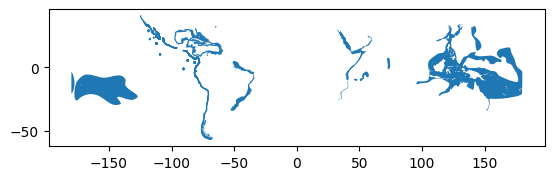

In [ ]:
data.plot()

## Writing data into a file

It is possible to export spatial data into various data formats using the `.to_file()` method in `geopandas`. Let's practice writing data into the geopackage file format. Before proceeding, let's check how the data looks like at this point.

In [ ]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


Write the data into a file using the `.to_file()` method.

In [ ]:
# Create a output path for the data
output_fp = "new_data.shp"

# Write the file
data.to_file(output_fp)

#### Question

> Indented block



Read the output file using `geopandas` and check that the data looks ok.

In [ ]:
# Use this cell to enter your solution.

In [ ]:
# Solution

temp = gpd.read_file(output_fp)

# Check first rows
temp.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


<Axes: >

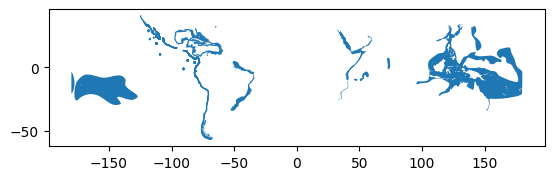

In [ ]:
# Solution

# You can also plot the data for a visual check
temp.plot()

## Geometries in geopandas

A `GeoDataFrame` has one column for storing geometries. By default, `geopandas` looks for the geometries from a column called `geometry`. It is also possible to define other columns as the geometry column. Th geometry column is a `GeoSeries` that contains shapely's geometric objects.  Let's have a look at the geometry column of our sample data.

In [ ]:
data["geometry"].head()

0    POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1    POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3    POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4    POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
Name: geometry, dtype: geometry

Since spatial data is stored as Shapely objects, it is possible to use all of the functionalities of Shapely module that we practiced earlier. More information [here](https://pythongis.org/part2/chapter-06/nb/00-introduction-to-geographic-objects.html).

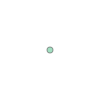

In [ ]:
from shapely.geometry import Point

point = Point(2.2, 4.2)
point3D = Point(9.26, -2.456, 0.57)

point

Let’s print the areas of the first 5 polygons:

In [ ]:
# Make a selection that contains only the first five rows
selection = data[0:5]

We can iterate over the selected rows using a specific .iterrows() -function in (geo)pandas and print the area for each polygon:

In [ ]:
for index, row in selection.iterrows():
   poly_area = row['geometry'].area
   print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


Hence, as you might guess from here, all the functionalities of Pandas are available directly in Geopandas without the need to call pandas separately because Geopandas is an extension for Pandas.


Let’s next create a new column into our GeoDataFrame where we calculate and store the areas individual polygons. Calculating the areas of polygons is really easy in geopandas by using GeoDataFrame.area attribute:

In [ ]:
data['area'] = data.area

<ipython-input-69-a77912d26f76>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['area'] = data.area


Let’s see the first 2 rows of our ‘area’ column.



In [ ]:
data['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

Okey, so we can see that the area of our first polygon seems to be 19.39 and 6.14 for the second polygon. They correspond to the ones we saw in previous step when iterating rows, hence, everything seems to work as it should. Let’s check what is the min and the max of those areas using familiar functions from pandas

In [ ]:
# Maximum area
max_area = data['area'].max()

# Mean area
mean_area = data['area'].mean()

print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(mean_area, 2)))

Max area: 1493.2
Mean area: 19.96


## Creating a GeoDataFrame from scratch

It is possible to create spatial data from scratch by using `shapely`'s geometric objects and `geopandas`. This is useful as it makes it easy to convert, for example, a text file that contains coordinates into spatial data layers.

Let’s create an empty GeoDataFrame `GeoDataFrame`

In [ ]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

In [ ]:
# Let's see what's inside
newdata

""


The GeoDataFrame is empty since we haven’t placed any data inside.

Let’s create a new column called geometry that will contain our Shapely objects:

In [ ]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's see what's inside
newdata

<ipython-input-75-85daf2f24bd5>:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  newdata['geometry'] = None


,geometry


Now we have a geometry column in our GeoDataFrame but we don’t have any data yet.

Let’s create a Shapely Polygon repsenting the Helsinki Senate square that we can insert to our GeoDataFrame:

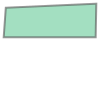

In [ ]:
from shapely.geometry import Polygon

# Coordinates of the Helsinki Senate square in decimal degrees
coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)
poly

Okey, so now we have appropriate Polygon -object.

Let’s insert the polygon into our ‘geometry’ column in our GeoDataFrame:

In [ ]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
newdata

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


In [ ]:
newdata

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


Now we have a GeoDataFrame with Polygon that we can export to a Shapefile.

Let’s add another column to our GeoDataFrame called Location with text Senaatintori.

In [ ]:
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'Senaatintori'

# Let's check the data
newdata

,geometry,Location
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senaatintori


There it is! Now we have two columns in our data; one representing the geometry and another with additional attribute information. From here, you could proceed into adding additional rows of data, or printing out the data to a file.

Before exporting the data it is useful to determine the coordinate reference system (projection) for the GeoDataFrame.

GeoDataFrame has a property called .crs that (more about projection on next section) shows the coordinate system of the data which is empty (None) in our case since we are creating the data from the scratch:

In [ ]:
print(newdata.crs)

None


Let’s add a crs for our GeoDataFrame. A Python module called fiona has a nice function called from_epsg() for passing coordinate system for the GeoDataFrame. Next we will use that and determine the projection to WGS84 (epsg code: 4326):


In [ ]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
newdata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Finally, we can export the data using GeoDataFrames .to_file() -function. The function works similarly as numpy or pandas, but here we only need to provide the output path for the Shapefile. Easy isn’t it!:

In [ ]:
# Determine the output path for the Shapefile
outfp = r"Data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

Now we have successfully created a Shapefile from the scratch using only Python programming. Similar approach can be used to for example to read coordinates from a text file (e.g. points) and create Shapefiles from those automatically.

# Working with Map Projections

Coordinate reference systems (CRS) are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth. A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees).

## Download data

For this tutorial we will be using a Shapefile representing Europe. Download and extract [Europe_borders.zip](https://automating-gis-processes.github.io/CSC18/_static/data/L2/Europe_borders.zip) file that contains a Shapefile with following files:

In [ ]:

!unzip Europe_borders.zip
!cd Europe_borders
!ls

## Coordinate reference system (CRS)

GeoDataFrame that is read from a Shapefile contains always (well not always but should) information about the coordinate system in which the data is projected.

Let’s start by reading the data from the Europe_borders.shp file.

In [ ]:
# Filepath to the Europe borders Shapefile
fp = "Europe_borders.shp"

# Read data
data = gpd.read_file(fp)


In [ ]:
data

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."
...,...,...
3627,Europe/Stockholm,"POLYGON ((18.75422 59.49353, 18.74311 59.49050..."
3628,Europe/Stockholm,"POLYGON ((18.84164 59.50605, 18.84028 59.50797..."
3629,Europe/Stockholm,"POLYGON ((18.59995 59.45653, 18.59431 59.45964..."
3630,Europe/Minsk,"POLYGON ((30.00000 51.48947, 29.99511 51.48572..."


We can see the current coordinate reference system from .crs attribute:

In [ ]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Okey, so from this disctionary we can see that the data is something called epsg:4326. The EPSG number (“European Petroleum Survey Group”) is a code that tells about the coordinate system of the dataset. “EPSG Geodetic Parameter Dataset is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local in application”. EPSG-number 4326 that we have here belongs to the WGS84 coordinate system (i.e. coordinates are in decimal degrees (lat, lon)).

You can find a lot of information about different available coordinate reference systems from:

* www.spatialreference.org
* www.proj4.org
* www.mapref.org

Let’s also check the values in our geometry column.

In [ ]:
data['geometry'].head()

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry

Okey, so the coordinate values of the Polygons indeed look like lat-lon values.

Let’s convert those geometries into Lambert Azimuthal Equal Area projection (EPSG: 3035). Changing the projection is really easy to do in Geopandas with .to_crs() -function. As an input for the function, you should define the column containing the geometries, i.e. geometry in this case, and a epgs value of the projection that you want to use.

In [ ]:
# Let's take a copy of our layer
data_proj = data.copy()

# Reproject the geometries by replacing the values with projected ones
data_proj = data_proj.to_crs(epsg=3035)

In [ ]:
data_proj['geometry'].head()

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry

And here we go, the numbers have changed! Now we have successfully changed the projection of our layer into a new one, i.e. to ETRS-LAEA projection.

To really understand what is going on, it is good to explore our data visually. Hence, let’s compare the datasets by making maps out of them.

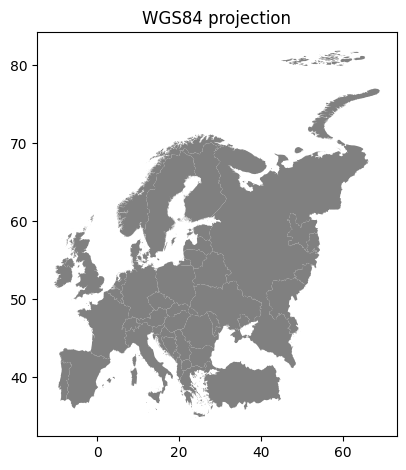

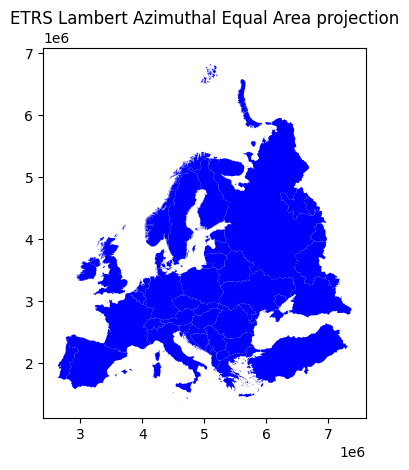

In [ ]:
import matplotlib.pyplot as plt

# Plot the WGS84
data.plot(facecolor='gray');

# Add title
plt.title("WGS84 projection");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
data_proj.plot(facecolor='blue');

# Add title
plt.title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

Indeed, they look quite different and our re-projected one looks much better in Europe as the areas especially in the north are more realistic and not so stretched as in WGS84.



Next, we still need to change the crs of our GeoDataFrame into EPSG 3035 as now we only modified the values of the geometry column. We can take use of fiona’s from_epsg -function.

In [ ]:
from fiona.crs import from_epsg

# Determine the CRS of the GeoDataFrame
data_proj.crs = from_epsg(3035)

# Let's see what we have
data_proj.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- [north]: Northing (metre)
- [east]: Easting (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Finally, let’s save our projected layer into a Shapefile so that we can use it later.

In [ ]:
# Ouput file path
outfp = r"/Europe_borders_epsg3035.shp"

# Save to disk
data_proj.to_file(outfp)

# Decoding

Geocoding, i.e. converting addresses into coordinates or vice versa, is a really common GIS task. Luckily, in Python there are nice libraries that makes the geocoding really easy. One of the libraries that can do the geocoding for us is geopy that makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

It is possible to do geocoding in Geopandas using its integrated functionalities of geopy. Geopandas has a function called geocode() that can geocode a list of addresses (strings) and return a GeoDataFrame containing the resulting point objects in geometry column. Nice, isn’t it! Let’s try this out.

Download a text file called [addresses.txt](https://automating-gis-processes.github.io/CSC18/_static/data/L3/addresses.txt) that contains few addresses around Helsinki Region. The first rows of the data looks like following:


    id;addr
    1000;Itämerenkatu 14, 00101 Helsinki, Finland
    1001;Kampinkuja 1, 00100 Helsinki, Finland
    1002;Kaivokatu 8, 00101 Helsinki, Finland
    1003;Hermannin rantatie 1, 00580 Helsinki, Finland


We have an id for each row and an address on column addr.

Let’s first read the data into a Pandas DataFrame using read_csv() -function:

In [ ]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Filepath
fp = "addresses.txt"

# Read the data
data = pd.read_csv(fp, sep=";")

In [ ]:
len(data)

34

In [ ]:
# Let's take a look of the data
data.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


Now we have our data in a Pandas DataFrame and we can geocode our addresses.



In [ ]:
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses using Nominatim.
# You can provide your own
geo = geocode(data["addr"], provider="nominatim", user_agent="pythongis_book", timeout=10)

In [ ]:
geocode?

In [ ]:
geo.head(2)

,geometry,address
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Salmisaari, Ruoh..."
1,POINT (24.93166 60.16905),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."


And Voilà! As a result we have a GeoDataFrame that contains our original address and a ‘geometry’ column containing Shapely Point -objects that we can use for exporting the addresses to a Shapefile for example. However, the id column is not there. Thus, we need to join the information from data into our new GeoDataFrame geo, thus making a Table Join.

In this case, we can join the information using the .join() function because the original data frame and the geocoded output have an identical index and an identical number of rows.

In [ ]:
join = geo.join(data)

In [ ]:
join.head()

,geometry,address,id,addr
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Salmisaari, Ruoh...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,POINT (24.93166 60.16905),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,POINT (24.94168 60.16996),"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,POINT (24.97843 60.19024),"Hermannin rantatie, Verkkosaari, Kalasatama, S...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,POINT (24.92151 60.15662),"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


Let’s also check the data type of our new join table.

In [ ]:
type(join)

geopandas.geodataframe.GeoDataFrame

As a result we have a new GeoDataFrame called join where we now have all original columns plus a new column for geometry.

Now it is easy to save our address points into a Shapefile


In [ ]:
# Output file path
outfp = r"/addresses.shp"

# Save to Shapefile
join.to_file(outfp)

That’s it. Now we have successfully geocoded those addresses into Points and made a Shapefile out of them. Easy isn’t it! Let’s still take a look how our data looks like.

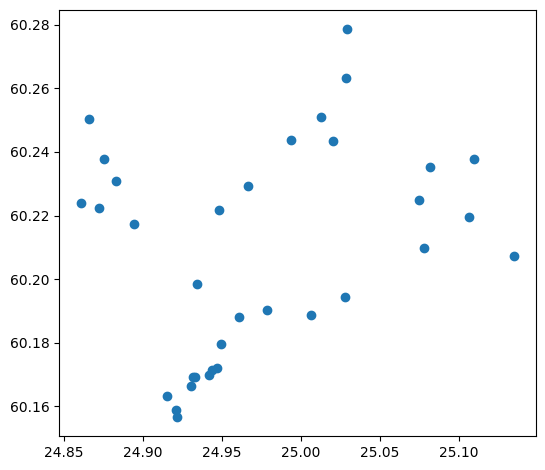

In [ ]:
join.plot()
plt.tight_layout();

# Operations between multiple datasets

<!---
- Selecting data based on spatial relationships
- Overlay analysis
- Spatial join, nearest join
- Distance operations
- Spatial index
-->

## Selecting data based on spatial relationships

Finding out if a certain point is located inside or outside of an area,
or finding out if a line intersects with another line or polygon are
fundamental geospatial operations that are often used e.g. to select
data based on location. Such spatial queries are one of the typical
first steps of the workflow when doing spatial analysis. Performing a
spatial join (will be introduced later) between two spatial datasets is
one of the most typical applications where Point in Polygon (PIP) query
is used.

For further reading about PIP and other geometric operations,
see Chapter 4.2 in Smith, Goodchild & Longley: [Geospatial Analysis - 6th edition](https://www.spatialanalysisonline.com/HTML/index.html).

### How to check if point is inside a polygon?

Computationally, detecting if a point is inside a polygon is most commonly done using a specific formula called [Ray Casting algorithm](https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm).
Luckily, we do not need to create such a function ourselves for
conducting the Point in Polygon (PIP) query. Instead, we can take
advantage of [Shapely's binary predicates](https://shapely.readthedocs.io/en/stable/manual.html#binary-predicates)
that can evaluate the topolocical relationships between geographical
objects, such as the PIP as we're interested here.

There are basically two ways of conducting PIP in Shapely:

1. using a function called
   [within()](https://shapely.readthedocs.io/en/stable/manual.html#object.within)
   that checks if a point is within a polygon
2. using a function called
   [contains()](https://shapely.readthedocs.io/en/stable/manual.html#object.contains)
   that checks if a polygon contains a point

Notice: even though we are talking here about **Point** in Polygon
operation, it is also possible to check if a LineString or Polygon is
inside another Polygon.

Let's import shapely functionalities and create some points:

In [ ]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

Let's also create a polygon using a list of coordinate-tuples:

In [ ]:
# Create a Polygon
coords = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]
poly = Polygon(coords)

In [ ]:
# Let's check what we have
print(p1)
print(p2)
print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


- Let's check if those points are ``within`` the polygon:

In [ ]:
# Check if p1 is within the polygon using the within function
p1.within(poly)

True

In [ ]:
# Check if p2 is within the polygon
p2.within(poly)

False

Okey, so we can see that the first point seems to be inside that polygon
and the other one isn't.

-In fact, the first point is quite close to close to the center of the polygon as we
can see if we compare the point location to the polygon centroid:

In [ ]:
# Our point
print(p1)

# The centroid
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.952242428492358 60.16960179038188)


It is also possible to do PIP other way around, i.e. to check if
polygon contains a point:

In [ ]:
# Does polygon contain p1?
poly.contains(p1)

True

In [ ]:
# Does polygon contain p2?
poly.contains(p2)

False

Thus, both ways of checking the spatial relationship are identical; [contains()](https://shapely.readthedocs.io/en/stable/manual.html#object.contains) is inverse to [within()](https://shapely.readthedocs.io/en/stable/manual.html#object.within) and vice versa.

Which one should you use then? Well, it depends:

-  if you have **many points and just one polygon** and you try to find out
   which one of them is inside the polygon: You might need to iterate over the points and check one at a time if it
   is **within()** the polygon.

-  if you have **many polygons and just one point** and you want to find out
   which polygon contains the point: You might need to iterate over the polygons until you find a polygon that **contains()** the point specified (assuming there are no overlapping polygons)

## Intersect

Another typical geospatial operation is to see if a geometry intersects
or touches another one. Again, there are binary operations in Shapely for checking these spatial relationships:

- [intersects():](https://shapely.readthedocs.io/en/stable/manual.html#object.intersects) Two objects intersect if the boundary or interior of one object intersect in any way with the boundary or interior of the other object.

- [touches():](https://shapely.readthedocs.io/en/stable/manual.html#object.touches) Two objects touch if the objects have at least one point in common and their interiors do not intersect with any part of the other object.
   

Let's try these out.

Let's create two LineStrings:

In [ ]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

Let's see if they intersect

In [ ]:
line_a.intersects(line_b)

True

Do they also touch?

In [ ]:
line_a.touches(line_b)

True

Indeed, they do and we can see this by plotting the features together

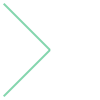

In [ ]:
# Create a MultiLineString from line_a and line_b
multi_line = MultiLineString([line_a, line_b])
multi_line

Thus, the ``line_b`` continues from the same node ( (1,1) ) where ``line_a`` ends.

However, if the lines overlap fully, they don't touch due to the spatial relationship rule, as we can see:

Check if `line_a` touches itself:

In [ ]:
# Does the line touch with itself?
line_a.touches(line_a)

False

It does not. However, it does intersect:

In [ ]:
# Does the line intersect with itself?
line_a.intersects(line_a)

True

## Spatial join

[Spatial join](http://wiki.gis.com/wiki/index.php/Spatial_Join) is
yet another classic GIS problem. Getting attributes from one layer and
transferring them into another layer based on their spatial relationship
is something you most likely need to do on a regular basis.

In the previous section we learned how to perform **a Point in Polygon query**.
We can now use the same logic to conduct **a spatial join** between two layers based on their
spatial relationship. We could, for example, join the attributes of a polygon layer into a point layer where each point would get the
attributes of a polygon that ``contains`` the point.

Luckily, [spatial join is already implemented in Geopandas](http://geopandas.org/mergingdata.html#spatial-joins), thus we do not need to create our own function for doing it. There are three possible types of
join that can be applied in spatial join that are determined with ``op`` -parameter in the ``gpd.sjoin()`` -function:

-  ``"intersects"``
-  ``"within"``
-  ``"contains"``

Sounds familiar? Yep, all of those spatial relationships were discussed
in the [Point in Polygon lesson](point-in-polygon.ipynb), thus you should know how they work.

Furthermore, pay attention to the different options for the type of join via the `how` parameter; "left", "right" and "inner". You can read more about these options in the [geopandas sjoin documentation](http://geopandas.org/mergingdata.html#sjoin-arguments) and pandas guide for [merge, join and concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

Let's perform a spatial join between these two layers:
- **Addresses:** the geocoded address-point (we created this Shapefile in the geocoding tutorial)
- **Population grid:** 250m x 250m grid polygon layer that contains population information from the Helsinki Region.
    - The population grid a dataset is produced by the **Helsinki Region Environmental
Services Authority (HSY)** (see [this page](https://www.hsy.fi/fi/asiantuntijalle/avoindata/Sivut/AvoinData.aspx?dataID=7) to access data from different years).
    - You can download the data from [from this link](https://www.hsy.fi/sites/AvoinData/AvoinData/SYT/Tietoyhteistyoyksikko/Shape%20(Esri)/V%C3%A4est%C3%B6tietoruudukko/Vaestotietoruudukko_2018_SHP.zip) in the  [Helsinki Region Infroshare
(HRI) open data portal](https://hri.fi/en_gb/).


- Here, we will access the data directly from the HSY wfs:

<!-- #endregion -->

In [ ]:
!pip install geojson

In [ ]:
import geopandas as gpd
from pyproj import CRS
import requests
import geojson

# Specify the url for web feature service
url = "https://kartta.hsy.fi/geoserver/wfs"

# Specify parameters (read data in json format).
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(
    service="WFS",
    version="2.0.0",
    request="GetFeature",
    typeName="asuminen_ja_maankaytto:Vaestotietoruudukko_2018",
    outputFormat="json",
)

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

Check the result:

In [ ]:
pop.head()

,geometry,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",688,9,28.0,99,99,99,99,99,99,99,99,99
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",703,5,51.0,99,99,99,99,99,99,99,99,99
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",710,8,44.0,99,99,99,99,99,99,99,99,99
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",711,5,90.0,99,99,99,99,99,99,99,99,99
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",715,11,41.0,99,99,99,99,99,99,99,99,99


Okey so we have multiple columns in the dataset but the most important
one here is the column `asukkaita` ("population" in Finnish) that
tells the amount of inhabitants living under that polygon.

-  Let's change the name of that column into `pop18` so that it is
   more intuitive. As you might remember, we can easily rename (Geo)DataFrame column names using the ``rename()`` function where we pass a dictionary of new column names like this: ``columns={'oldname': 'newname'}``.

In [ ]:
# Change the name of a column
pop = pop.rename(columns={"asukkaita": "pop18"})

# Check the column names
pop.columns

Index(['geometry', 'index', 'pop18', 'asvaljyys', 'ika0_9', 'ika10_19',
       'ika20_29', 'ika30_39', 'ika40_49', 'ika50_59', 'ika60_69', 'ika70_79',
       'ika_yli80'],
      dtype='object')

Let's also get rid of all unnecessary columns by selecting only columns that we need i.e. ``pop18`` and ``geometry``

In [ ]:
# Subset columns
pop = pop[["pop18", "geometry"]]

In [ ]:
pop.head()

,geometry,index,pop18,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",688,9,28.0,99,99,99,99,99,99,99,99,99
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",703,5,51.0,99,99,99,99,99,99,99,99,99
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",710,8,44.0,99,99,99,99,99,99,99,99,99
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",711,5,90.0,99,99,99,99,99,99,99,99,99
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",715,11,41.0,99,99,99,99,99,99,99,99,99


References:

https://pythongis.org/index.html

https://automating-gis-processes.github.io/CSC18/index.html